In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:

# 1. Załaduj dane
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", header=None)
data.columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

In [3]:
# Podziel dane na cechy (X) i etykiety (y)
X = data.drop("Outcome", axis=1).values
y = data["Outcome"].values

# Podziel dane na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Znormalizuj dane
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# 2. Zbuduj model Sequential
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 3. Skompiluj model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
# 4. Wytrenuj model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
16/16 [==============================] - 2s 28ms/step - loss: 0.6520 - accuracy: 0.6802 - val_loss: 0.6352 - val_accuracy: 0.6829
Epoch 2/50
16/16 [==============================] - 0s 8ms/step - loss: 0.5822 - accuracy: 0.7128 - val_loss: 0.5856 - val_accuracy: 0.7073
Epoch 3/50
16/16 [==============================] - 0s 8ms/step - loss: 0.5290 - accuracy: 0.7454 - val_loss: 0.5411 - val_accuracy: 0.7073
Epoch 4/50
16/16 [==============================] - 0s 7ms/step - loss: 0.4863 - accuracy: 0.7699 - val_loss: 0.5052 - val_accuracy: 0.7561
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 0.4642 - accuracy: 0.7800 - val_loss: 0.4909 - val_accuracy: 0.7561
Epoch 6/50
16/16 [==============================] - 0s 11ms/step - loss: 0.4502 - accuracy: 0.7821 - val_loss: 0.4815 - val_accuracy: 0.7642
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4396 - accuracy: 0.7841 - val_loss: 0.4782 - val_accuracy: 0.7642
Epoch 8/50
16/16 [

In [6]:
# 5. Oceń model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Dokładność na zbiorze testowym: {accuracy * 100:.2f}%")

Dokładność na zbiorze testowym: 73.38%


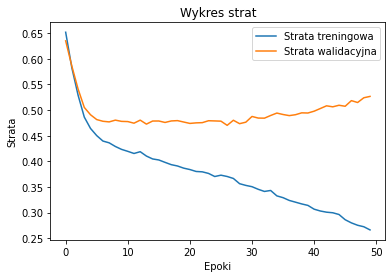

In [7]:
# 6. Zwizualizuj wyniki
import matplotlib.pyplot as plt

# Wykres strat
plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.title('Wykres strat')
plt.show()

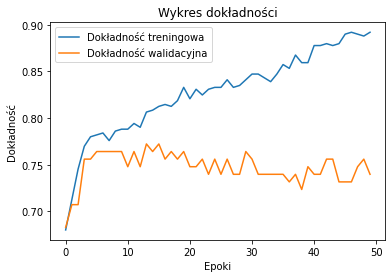

In [8]:
# Wykres dokładności
plt.plot(history.history['accuracy'], label='Dokładność treningowa')
plt.plot(history.history['val_accuracy'], label='Dokładność walidacyjna')
plt.xlabel('Epoki')
plt.ylabel('Dokładność')
plt.legend()
plt.title('Wykres dokładności')
plt.show()

In [9]:

# 7. Przewidywanie na przykładowych danych
sample_data = np.array([[5, 166, 72, 19, 175, 25.8, 0.587, 51]])  # Przykladowe dane
sample_data = scaler.transform(sample_data)
prediction = model.predict(sample_data)
print(f"Prawdopodobieństwo wystąpienia cukrzycy: {prediction[0][0]:.2f}")

1/1 [==============================] - 0s 184ms/step
Prawdopodobieństwo wystąpienia cukrzycy: 0.59
